In [3]:
"""
Sharpshooter    NBA Tiers: Must include players from each tier.
Scoring Rules

point = +1Pt
3pt Shot = +0.5
Rebound = 1.25 Pts
Assist = +1.5 Pts
Steal = +2 Pts
Block = +2 Pts
Turnover = -0.5 Pts

Double-Double
{Max 1 Per Player:
Points, Rebounds,  = +1.5 Pts
Assists, BLocks,
Steals}

Triple-Double
{Max 1 Per Player:
Points, Rebounds,  = +3 Pts
Assists, BLocks,
Steals}



"""
import numpy as np
import pandas as pd
import itertools
from scipy.optimize import minimize, basinhopping, brute
import matplotlib.pyplot as plt 

'''
player_stats = ['Curry': [avg_points, avg_3Pt, avg_rebound, avg_assist, avg_steal, avg_block, avg_turnover],\
                'Lowry': [avg_points, avg_3Pt, avg_rebound, avg_assist, avg_steal, avg_block, avg_turnover]]
             
             
normal_score = [1.0, 0.5, 1.25, 1.5, 2.0, 2.0, -0.5]

my_score = [avg_points, avg_3Pt, avg_rebound, avg_assist, avg_steal, avg_block, avg_turnover, avg_minutes]
'''

player_stats = {'Anthony Davis':    [28.1, 0.8, 12.4, 4.70, 1.7, 2.8, 2.3],
                'LeBron James':     [28.2, 2.2, 7.80, 7.10, 1.3, 0.7, 3.4],
                'Nikola Jokic':     [17.4, 1.0, 10.0, 7.60, 1.4, 0.7, 2.9],
                'Kawhi Leonard':    [26.2, 1.9, 8.20, 3.00, 1.8, 0.7, 2.0],
                'Jrue Holiday':     [20.5, 1.4, 4.30, 8.90, 1.8, 0.7, 3.8],
                'John Wall':        [20.8, 1.5, 3.50, 8.70, 1.6, 1.6, 3.4],
                'Bradley Beal':     [23.1, 2.3, 4.30, 4.50, 1.0, 1.0, 2.4],
                'Julius Randle':    [19.3, 0.6, 9.50, 2.80, 0.6, 0.6, 2.5],
                'Kyle Lowry':       [14.2, 2.1, 4.40, 10.0, 1.4, 0.4, 2.8],
                'Hassan Whiteside': [13.2, 0.1, 13.4, 0.90, 0.6, 2.9, 1.7],
                'DeAaron Fox':      [18.1, 1.3, 3.60, 7.60, 1.5, 0.5, 3.3],
                'Luka Doncic':      [17.8, 2.2, 6.80, 4.50, 1.1, 0.3, 3.5],
                'DeAndre Jordan':   [11.1, 0.0, 13.6, 2.10, 0.7, 1.0, 2.5],
                'Kyle Kuzma':       [18.1, 1.8, 5.70, 2.20, 0.6, 0.6, 1.6],
                'Josh Richardson':  [18.5, 2.6, 3.90, 3.50, 1.2, 0.6, 2.0],
                'Jamal Murray':     [17.4, 1.4, 4.40, 4.80, 0.9, 0.4, 2.4],
                'Cauley Stein':     [14.3, 0.0, 8.50, 2.40, 1.2, 0.5, 1.4],
                'Serge Ibaka':      [16.8, 0.7, 7.50, 1.40, 0.5, 1.4, 1.7],
                'Buddy Hield':      [18.9, 2.8, 5.20, 2.50, 0.5, 0.4, 2.1],
                'Lonzo Ball':       [8.30, 1.3, 5.10, 5.00, 1.5, 0.3, 2.0],
                'Harrison Barnes':  [17.9, 2.5, 4.40, 1.20, 0.7, 0.3, 1.6],
                'B. Bogdanovic':    [15.2, 2.1, 3.30, 3.80, 0.8, 0.1, 1.2],
                'Dennis Smith Jr.': [13.0, 1.3, 3.00, 4.00, 1.3, 0.5, 3.3],
                'Markieff Morris':  [11.7, 1.5, 5.30, 1.80, 0.8, 0.6, 1.4],
                'Bam Adebayo':      [8.10, 0.0, 7.10, 1.70, 0.7, 1.0, 1.3],
                'Fred VanVleet':    [9.70, 1.5, 2.40, 4.50, 0.9, 0.1, 1.4],
                'J. Hernangomez':   [10.1, 1.7, 5.60, 1.00, 0.6, 0.5, 0.9],
                'Kelly Olynyk':     [10.0, 1.6, 4.30, 2.20, 0.7, 0.4, 1.4],
                'JaVale McGee':     [11.8, 0.0, 6.70, 0.80, 0.8, 2.6, 1.6],
                'Nemanja Bjelica':  [11.4, 1.6, 5.70, 2.00, 0.9, 0.6, 1.5],
                'Justise Winslow':  [10.8, 1.3, 5.20, 3.50, 0.9, 0.4, 2.2],
                'Danny Green':      [9.90, 2.4, 4.20, 1.40, 0.9, 0.8, 1.0],
                'Mason Plumlee':    [7.00, 0.0, 5.40, 2.10, 1.1, 1.0, 1.5],
                'Trey Lyles':       [10.0, 0.8, 4.80, 1.50, 0.6, 0.5, 1.6],
                'Josh Hart':        [9.20, 1.8, 3.30, 1.20, 1.1, 0.7, 0.9],
                'Tim Frazier':      [4.80, 0.7, 2.70, 4.80, 0.6, 0.0, 1.4]
               }

tier_players = {'tier1' : ['Anthony Davis','LeBron James','Nikola Jokic'],
                
                'tier2' : ['Kawhi Leonard','Jrue Holiday','John Wall','Bradley Beal',
                           'Julius Randle'],
                
                'tier3' : ['Kyle Lowry','Hassan Whiteside','DeAaron Fox', 'Luka Doncic',
                           'DeAndre Jordan','Kyle Kuzma'],
                
                'tier4' : ['Josh Richardson','Jamal Murray','Cauley Stein','Serge Ibaka',
                           'Buddy Hield','Lonzo Ball'],
                
                'tier5' : ['Harrison Barnes','B. Bogdanovic','Dennis Smith Jr.','Markieff Morris',
                           'Bam Adebayo','Fred VanVleet',
                          'J. Hernangomez','Kelly Olynyk'],
                
                'tier6' : ['JaVale McGee','Nemanja Bjelica','Justise Winslow','Danny Green',
                           'Mason Plumlee','Trey Lyles',
                          'Josh Hart','Tim Frazier']
               }

score_options = [1.0, 0.5, 1.25, 1.5, 2.0, 2.0, -0.5]

t1r = np.linspace(0,np.size(tier_players['tier1'])-1, np.size(tier_players['tier1']), dtype = int)
t2r = np.linspace(0,np.size(tier_players['tier2'])-1, np.size(tier_players['tier2']), dtype = int)
t3r = np.linspace(0,np.size(tier_players['tier3'])-1, np.size(tier_players['tier3']), dtype = int)
t4r = np.linspace(0,np.size(tier_players['tier4'])-1, np.size(tier_players['tier4']), dtype = int)
t5r = np.linspace(0,np.size(tier_players['tier5'])-1, np.size(tier_players['tier5']), dtype = int)
t6r = np.linspace(0,np.size(tier_players['tier6'])-1, np.size(tier_players['tier6']), dtype = int)

def scoring(x0, player_stats, tier_players, score_options):
    
    t1, t2, t3, t4, t5, t6 = x0
    
    tier_scores = [np.dot(player_stats[tier_players['tier1'][t1]] , score_options),
                   np.dot(player_stats[tier_players['tier2'][t2]] , score_options),
                   np.dot(player_stats[tier_players['tier3'][t3]] , score_options),
                   np.dot(player_stats[tier_players['tier4'][t4]] , score_options),
                   np.dot(player_stats[tier_players['tier5'][t5]] , score_options),
                   np.dot(player_stats[tier_players['tier6'][t6]] , score_options)]

    total_points = np.sum(tier_scores)
    
    return total_points

In [4]:
x0 = [0,1,2,0,0,2]
scoring(x0, player_stats, tier_players, score_options)

223.8

In [5]:
x0 = [0,0,2,0,0,2]

In [6]:
#fun random search
rdm_t1 = np.random.choice(t1r)
rdm_t2 = np.random.choice(t2r)
rdm_t3 = np.random.choice(t3r)
rdm_t4 = np.random.choice(t4r)
rdm_t5 = np.random.choice(t5r)
rdm_t6 = np.random.choice(t6r)

x0 = [rdm_t1,rdm_t2,rdm_t3,rdm_t4,rdm_t5,rdm_t6]
scoring(x0, player_stats, tier_players, score_options)

199.6

In [7]:
def dev_scoring(t1, t2, t3, t4, t5, t6, player_stats, tier_players, score_options):
    
    tier_scores = [np.dot(player_stats[tier_players['tier1'][t1]] , score_options),
                   np.dot(player_stats[tier_players['tier2'][t2]] , score_options),
                   np.dot(player_stats[tier_players['tier3'][t3]] , score_options),
                   np.dot(player_stats[tier_players['tier4'][t4]] , score_options),
                   np.dot(player_stats[tier_players['tier5'][t5]] , score_options),
                   np.dot(player_stats[tier_players['tier6'][t6]] , score_options)]

    total_points = np.sum(tier_scores)
    
    return total_points

In [8]:
#Let's vectorize the function
scoring_vect = np.vectorize(dev_scoring , excluded = [6,7,8])

#create a meshgrid
Tr1, Tr2, Tr3, Tr4, Tr5, Tr6 = np.meshgrid(t1r, t2r, t3r, t4r, t5r, t6r)

results = scoring_vect(Tr1, Tr2, Tr3, Tr4, Tr5, Tr6, player_stats, tier_players, score_options)

In [9]:
-np.sort(-results, axis = None)

array([230.3  , 229.975, 229.925, ..., 175.55 , 175.25 , 175.025])

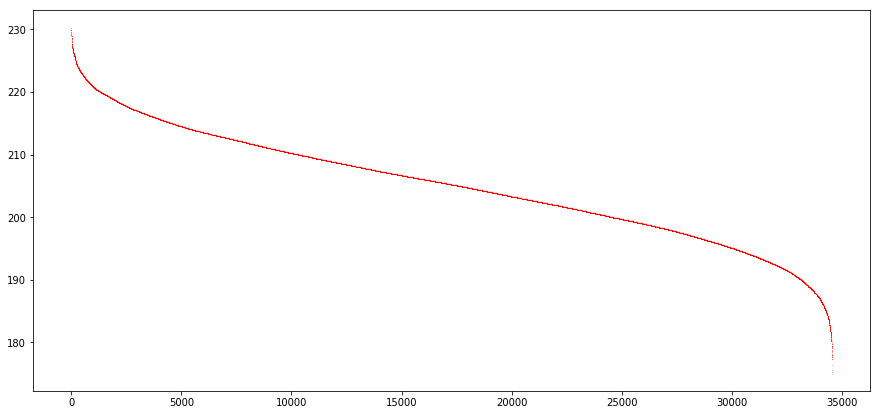

In [10]:
fig, ax = plt.subplots(figsize = (15,7,))
plt.plot(-np.sort(-results, axis = None),  '*r', markersize = 0.1)
plt.show()

In [11]:
np.max(results)

230.3

In [12]:
np.min(results)

175.025